In [2]:
#Import all the necessary modfrom pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd

# Load the Bank personal loan dataset

In [3]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [4]:
print(df.dtypes, df.shape)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object (5000, 14)


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


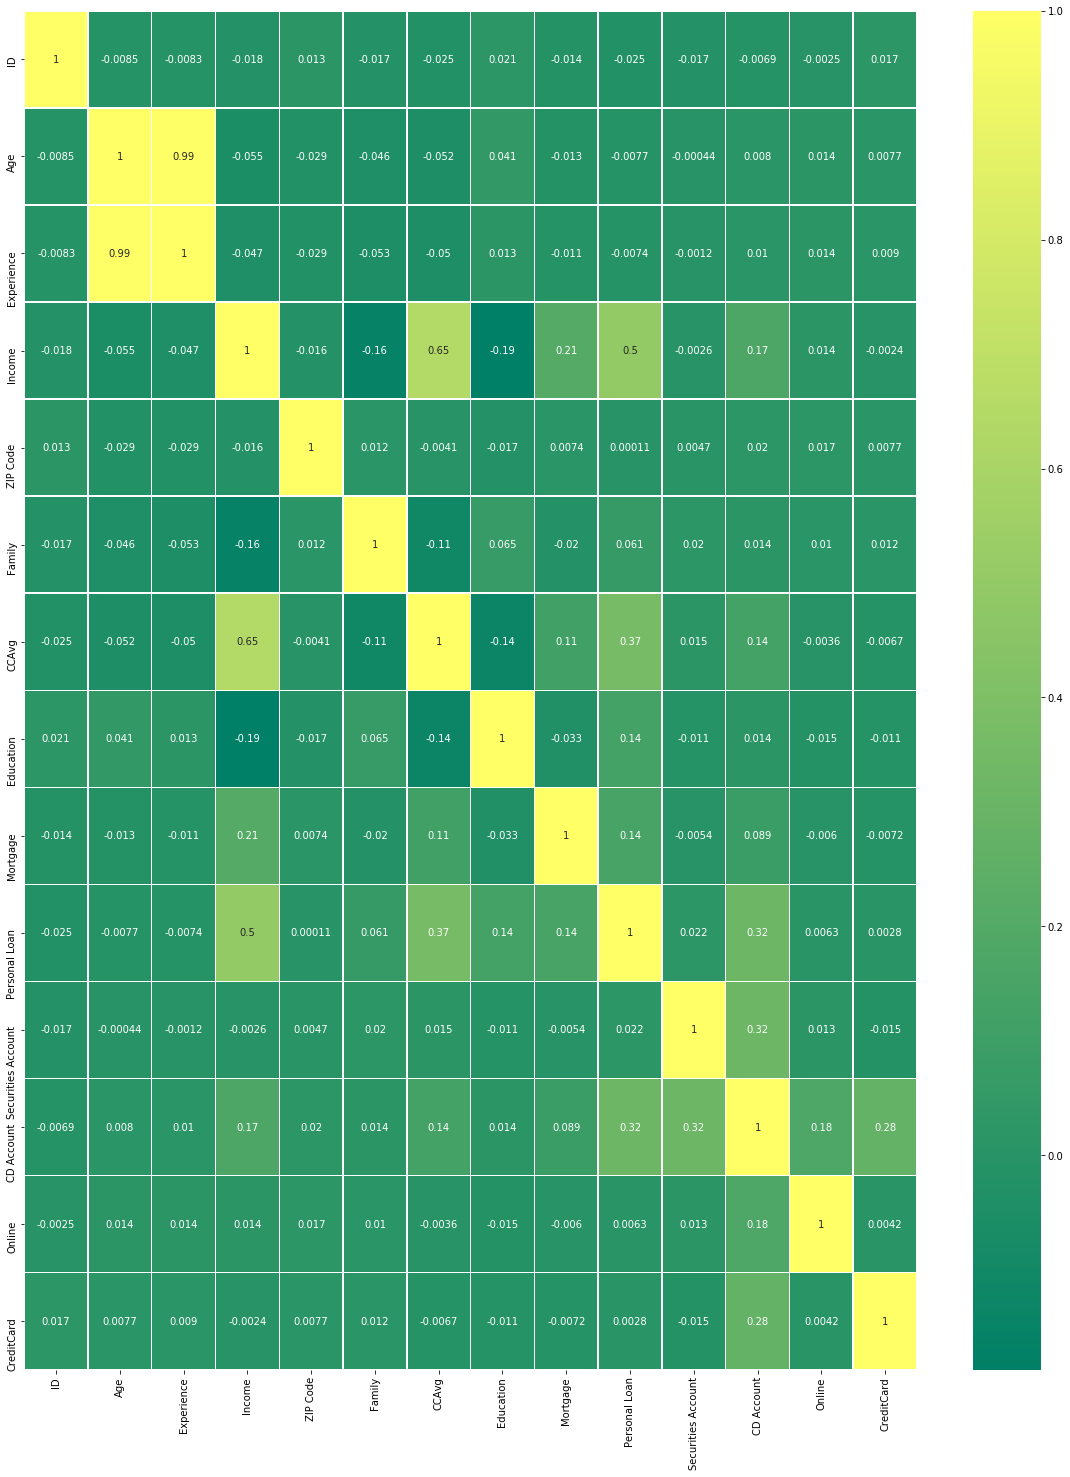

In [6]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax,cmap="summer")

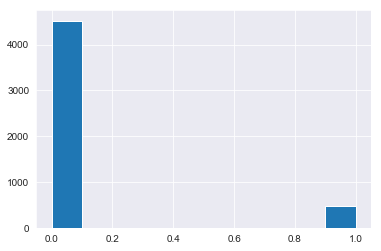

In [7]:
sns.set_style("darkgrid")
df['Personal Loan'].hist()

C:\Users\vbalaje\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


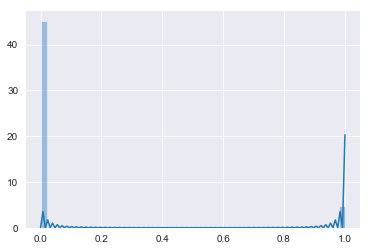

In [8]:
x=df['Personal Loan'].values
sns.distplot(x)

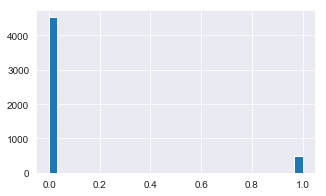

In [9]:
bin_values = np.arange(start=1, stop=20, step=.5)
df['Personal Loan'].hist(bins=30, figsize=[5,3])

C:\Users\vbalaje\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


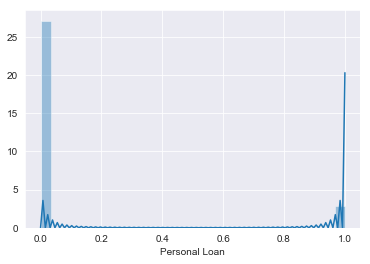

In [10]:
sns.distplot( df["Personal Loan"], bins=30)

In [12]:
array = df.values
X = array[:,[0,1,2,3,4,5,6,7,8,10,11,12,13]]  # All other columns are Independent variable (Feature)
Y = array[:,9]   #Personal Loan is the dependent variable (label)

4.Split the data into training and test set in the ratio of 70:30 respectively

In [13]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

In [14]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.96      0.91      0.93      1362
        1.0       0.39      0.59      0.47       138

avg / total       0.90      0.88      0.89      1500

[[1237  125]
 [  57   81]]


In [16]:
print(model.score(X_test , y_test))

0.8786666666666667


In [17]:
# Necessary imports: for a k fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict


In [18]:
# Perform 10-fold cross validation
scores = cross_val_score(model, X_test, y_test, cv=10)
print('Cross-validated scores:', scores.mean())

Cross-validated scores: 0.8973357927018977


# Logistic Regresssion

In [19]:
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)


In [20]:
print(model.score(X_test , y_test))

0.9153333333333333


# K-NN

In [21]:
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'uniform', metric='minkowski')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [22]:
predicted_labels = NNH.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_labels)

array([[1362,    0],
       [ 138,    0]], dtype=int64)

In [24]:
print(NNH.score(X_test , y_test))

0.908
